In [1]:
import pandas as pd
import numpy as np

# завантажуємо і чистимо датасет
file_path = '/Users/levmanulak/Desktop/Data 11-17 September.csv'
data = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
data.columns = data.columns.str.strip()
data = data.map(lambda x: x.strip() if isinstance(x, str) else x)


# девайс та підписка юзера
data['subscription_length'] = data['gp:product_id'].str.extract(r'(\d+)days').astype(float)
device_stats = data.groupby('device_type')['subscription_length'].agg(['mean', 'count'])

#ширший аналіз девайсу та підписки по країнах

# середня довжина підписки по девайсах
device_subscription_stats = data.groupby('device_type')['subscription_length'].agg(['mean', 'count']).reset_index()

# різниця у тріалах і довгих підписках по девайсах
device_trial_counts = data[data['gp:product_id'].str.contains('trial')].groupby('device_type').size()
device_long_term_counts = data[data['subscription_length'] > 30].groupby('device_type').size()

# локація та довжина купленої підписки
trial_subs_by_country = data[data['gp:product_id'].str.contains('trial')].groupby('country').size()

discounted_subscriptions_by_country = data[data['gp:product_id'].str.contains('down')].groupby('country').size()

upsells_by_country = data[data['gp:upsell_product_id'].notna()].groupby('country').size()


# ефективність каналів оплати
payment_stats = data.groupby('gp:payment_type')['subscription_length'].mean()

# ефективність апселів
upsells_by_payment_type = data[data['gp:upsell_product_id'].notna()].groupby('gp:payment_type').size()


# ефективність каналів і співвідношення до продаж
subscriptions_by_medium = data.groupby('gp:placement').size()

#середня довжина підписки по каналах
average_length_by_medium = data.groupby('gp:placement')['subscription_length'].mean()

# осн.країни та довжина підписок у них
key_countries = ['United States', 'United Kingdom', 'Singapore']
subscriptions_by_medium_country = data[data['country'].isin(key_countries)].groupby(['gp:placement', 'country']).size().unstack(fill_value=0)


# мова і к-сть продажів 
language_stats = data.groupby('language')['subscription_length'].mean()

#лише тріалки
trials_by_language = data[data['gp:product_id'].str.contains('trial')].groupby('language').size()

#довгі підписки
long_term_subs_by_language = data[data['subscription_length'] > 30].groupby('language').size()

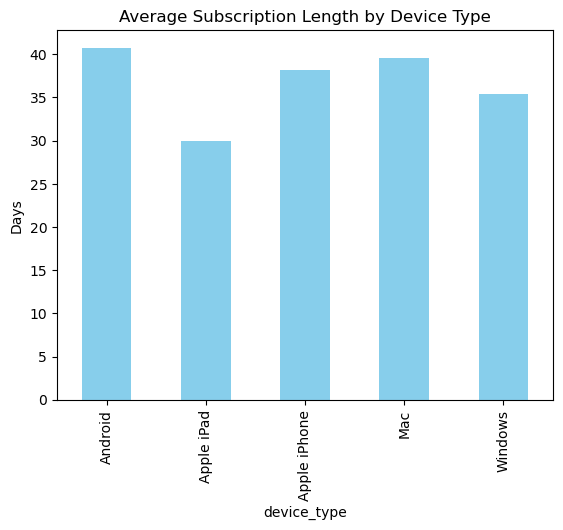

In [9]:
import matplotlib.pyplot as plt

#середня довжина підписки і девайс
device_stats['mean'].plot(kind='bar', color='skyblue', title='Average Subscription Length by Device Type')
plt.ylabel('Days')
plt.show()

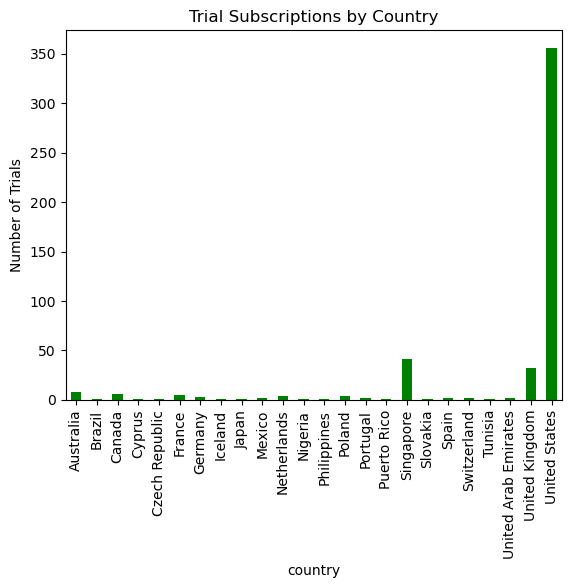

In [13]:
#підписки по країнах
trial_subs_by_country.plot(kind='bar', color='green', title='Trial Subscriptions by Country')
plt.ylabel('Number of Trials')
plt.show()

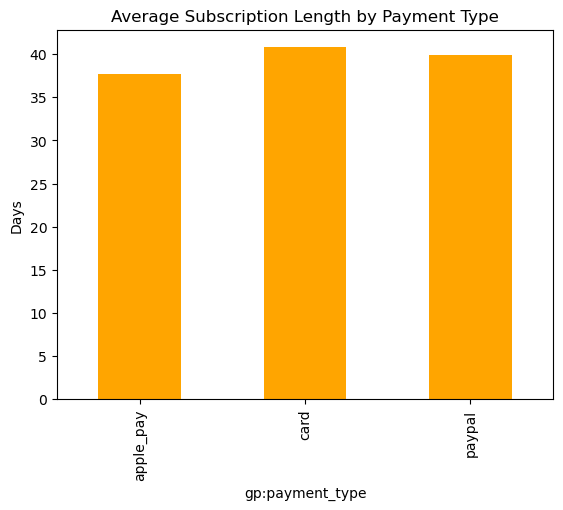

In [15]:
#середня довжитна підписки за типом оплати 
payment_stats.plot(kind='bar', color='orange', title='Average Subscription Length by Payment Type')
plt.ylabel('Days')
plt.show()

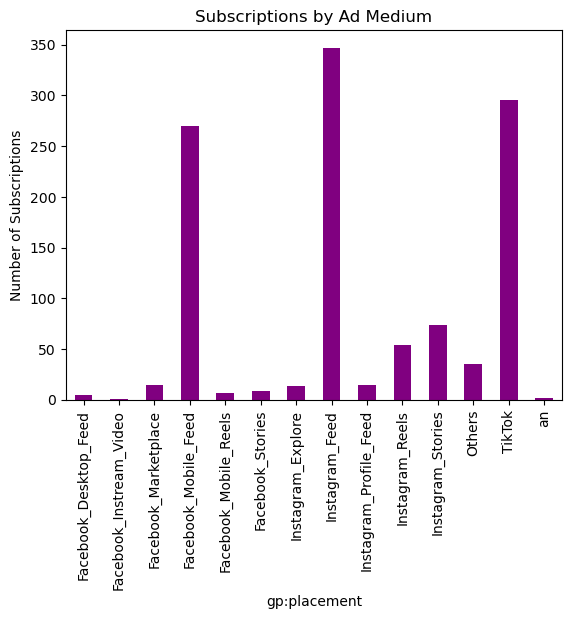

In [17]:
#підписка за каналом медіа
subscriptions_by_medium.plot(kind='bar', color='purple', title='Subscriptions by Ad Medium')
plt.ylabel('Number of Subscriptions')
plt.show()

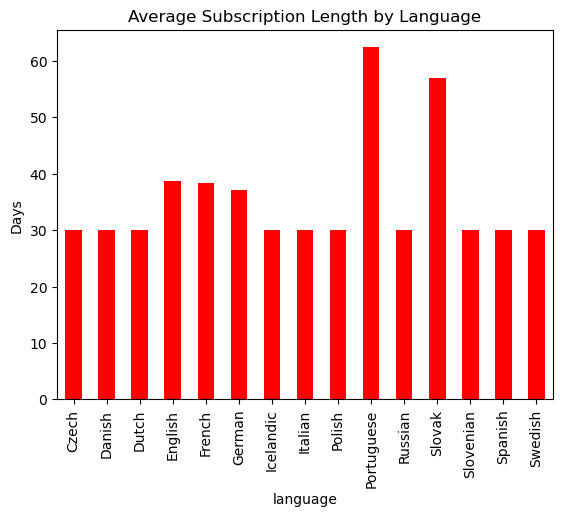

In [11]:
#середня довжина підписки за мовою
language_stats.plot(kind='bar', color='red', title='Average Subscription Length by Language')
plt.ylabel('Days')
plt.show()